https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

In [1]:
# Import the tools
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo
data = fetch_ucirepo(name='Abalone')
data = pd.DataFrame(data= data.data.original)

In [6]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# Check for missing values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

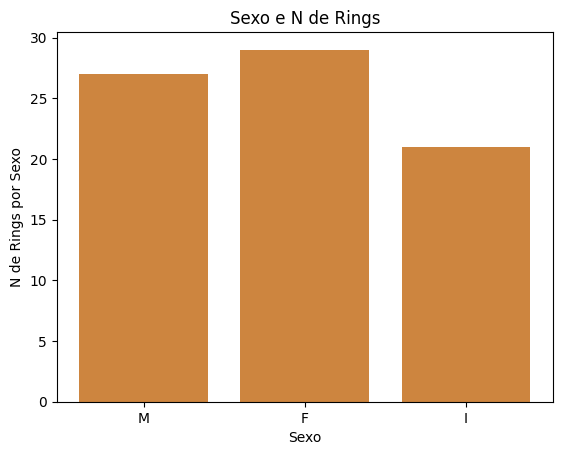

In [10]:
#verificação da quantidade de 
fig, ax = plt.subplots()
ax.bar(data["Sex"], data["Rings"], color="peru")
ax.set(title="Sexo e N de Rings", 
       xlabel="Sexo",
       ylabel="N de Rings por Sexo");

In [13]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


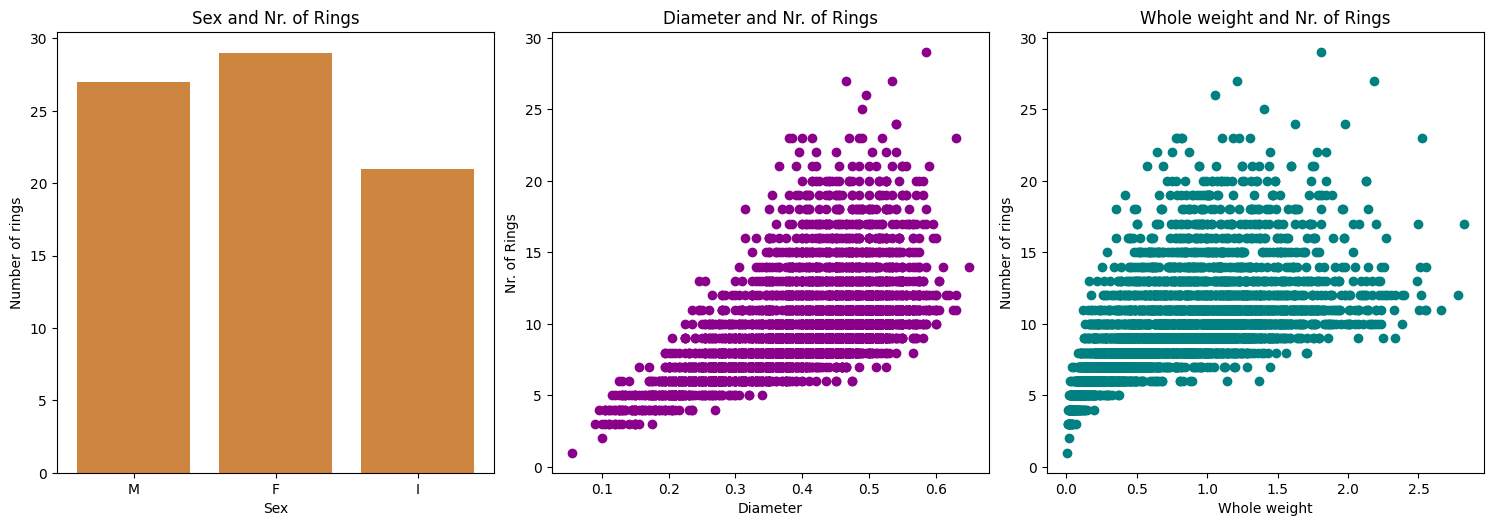

In [14]:
# Create a fig, ax
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) # first param "1" refers to nr. of rows, second param "3" referst to nr. of cols
fig.tight_layout()  #makes the columns more spaced out

#Sex and nr. of Rings
ax1.bar(data["Sex"], data["Rings"], color="peru")
ax1.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings")

# Diameter and nr. of Rings
ax2.scatter(data["Diameter"], data["Rings"], color="darkmagenta")
ax2.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")

# Whole weight and nr. of Rings
ax3.scatter(data["Whole_weight"], data["Rings"], color="teal")
ax3.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

In [15]:
'''data["Sex"] = data["Sex"].astype("category").cat.as_ordered()
data_codes = data["Sex"].cat.codes'''

In [20]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
data["Sex"] =  l_encoder.fit_transform(data["Sex"])

In [24]:

data["Age"] = data["Rings"] + 1.5

# Drop rings column
data.drop("Rings", axis=1, inplace=True)

In [22]:
data.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [25]:
X = data.drop("Age", axis=1) 
y = data["Age"]

In [40]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=14) 

In [42]:

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_jobs=-1,
                           random_state=14)


rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [41]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3341, 3341, 836, 836)

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [44]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [45]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

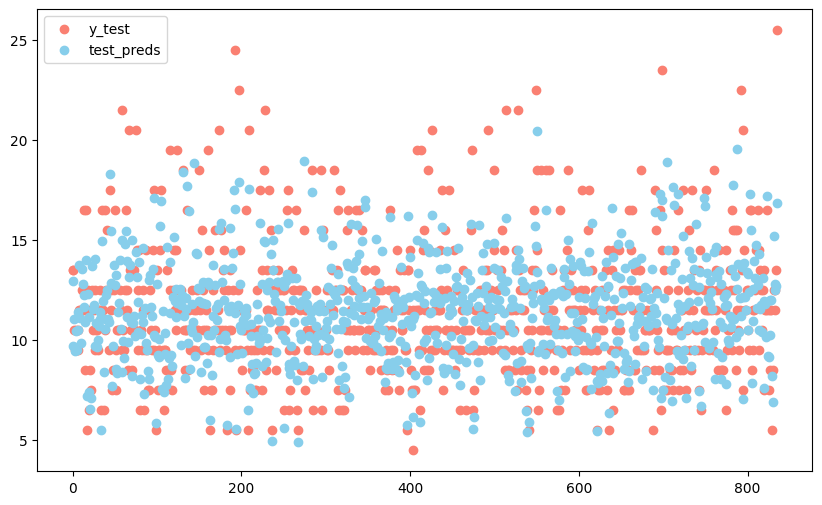

In [47]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();

In [48]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid, 
                              n_iter=100, 
                              cv=5,
                              verbose=True) 

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [49]:
show_score(rs_model)

{'Training MAE': 1.0099332085964559,
 'Test MAE': 1.4564998707948578,
 'Training MSE': 0.010372839180120582,
 'Test MSE': 0.022248941864928803,
 'Training RMSE': 0.10184713633735895,
 'Test RMSE': 0.14916079198277543,
 'Training R2': 0.797401613607706,
 'Test R2': 0.5607174360229721}

In [50]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [51]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [52]:
ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features=0.5,
                                    min_samples_leaf=5,
                                    min_samples_split=5,
                                    n_estimators=200)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [53]:
show_score(ideal_model)

{'Training MAE': 1.0888846217658412,
 'Test MAE': 1.451260997056705,
 'Training MSE': 0.012042030394793162,
 'Test MSE': 0.022037812052149837,
 'Training RMSE': 0.10973618543941266,
 'Test RMSE': 0.1484513794215124,
 'Training R2': 0.764907557028929,
 'Test R2': 0.564760518437327}

In [54]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [55]:
test_preds = ideal_model.predict(X_test)
test_preds [:20], y_test[:20]

(array([ 9.8678747 , 13.07819655, 10.77513246,  9.49515846, 10.84508447,
         9.51997706, 11.51575137, 10.76858128, 12.37564351, 11.33873382,
         9.78364102, 13.48334829, 12.29822577, 11.68888491, 12.23117913,
        11.09156077, 13.75424675,  7.34519703, 11.92183177,  7.58065507]),
 2374    13.5
 3341    13.5
 3361    10.5
 2574     9.5
 1624    10.5
 2874     9.5
 3908    10.5
 1302     9.5
 3771    11.5
 1024    11.5
 629     11.5
 890     12.5
 585     12.5
 2328    16.5
 2920    11.5
 1766     8.5
 778     16.5
 4119     5.5
 648     12.5
 538      6.5
 Name: Age, dtype: float64)

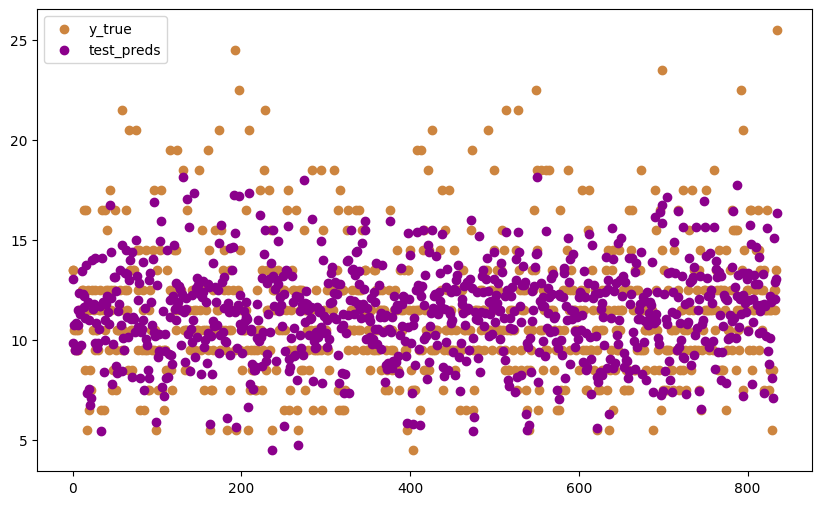

In [56]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="peru", label="y_true")
plt.scatter(range(y_test.shape[0]), test_preds, color="darkmagenta", label="test_preds")
plt.legend();

In [58]:
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
    .sort_values("feature_importances", ascending=False) # sort importances from the biggest to the smallest
    .reset_index(drop=True)) # deletes the index number

  #Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:20], color="skyblue")
  ax.set_ylabel("Features")
  ax.set_label("Feature importance")
  ax.invert_yaxis()

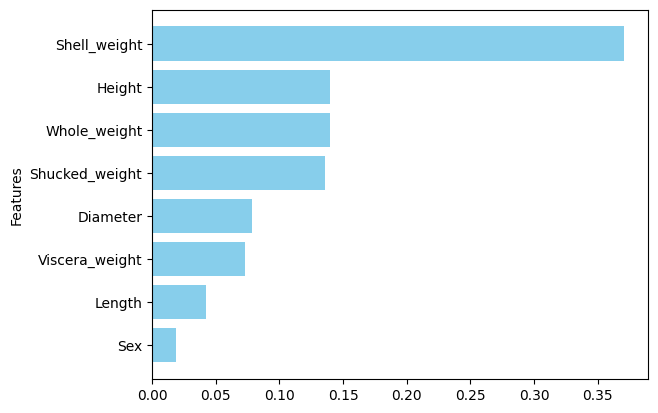

In [59]:
plot_features(X_train.columns, ideal_model.feature_importances_)